## Tool selected for this study:  Python

**Why Python?**

- It is considered a good language for starting programers. 
- The learning curve is relatively low and gradual.
- Emphasizes productivity and code readability.
- Fast growing community and support.
- Developers can also use it for scripting a website or other applications.
- Fast development of data science libraries. 

---

## Case of Study:

### [UNHCR Refugee Data: Data on Uprooted Populations and Asylum Processing](https://www.kaggle.com/unitednations/refugee-data/data)


Data Source: [Kaggle](https://www.kaggle.com/)

### Context:

*The mass movement of uprooted people is a highly charged geopolitical issue. This data, gathered by the UN High Commissioner for Refugees (UNHCR), covers movement of displaced persons (asylum seekers, refugees, internally displaced persons (IDP), stateless). Also included are destination country responses to asylum petitions.*

### Content:

This dataset includes 6 csv files covering:

 - Asylum monthly applications opened (asylum_seekers_monthly.csv)
 - Yearly progress through the refugee system (asylum_seekers.csv)
 - Refugee demographics (demographics.csv)
 - Yearly time series data on UNHCR’s populations of concern (time_series.csv)
 - Yearly population statistics on refugees by residence and destination (persons_of_concern.csv)
 - Yearly data on resettlement arrivals, with or without UNHCR assistance (resettlement.csv)

### Asylum Monthly Applications

*Description:* (1999-2016) Monthly totals about asylum applications opened in 38 European and 6 non-European countries, by month and origin. Repeat/reopened/appealed applications are largely excluded.

## Prepare Notebook

In [2]:
# Pandas is used for data analysis and data frame manipulation.
import pandas as pd
# Matplotlib is used for visualization.
import matplotlib.pyplot as plt
# Seaborn is another visualization library build on top of Matplotlib. 
import seaborn as sns
sns.set()

# Plotly is used for Dynamic Visualization.
import cufflinks as cf
import plotly.plotly as py
#init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

## Read Data

Download the data from ...

In [8]:
# Read .csv file.
## We just indicate the path where is stored.
raw_data_df = pd.read_csv('../data/refugee-data/asylum_seekers_monthly.csv')

raw_data_df.head()

,Country / territory of asylum/residence,Origin,Year,Month,Value
0,Australia,Afghanistan,1999,January,8
1,Australia,Afghanistan,1999,February,10
2,Australia,Afghanistan,1999,March,25
3,Australia,Afghanistan,1999,April,25
4,Australia,Afghanistan,1999,May,7


In [18]:
raw_data_df.shape

(332189, 5)

## Data Cleaning & Formating

In [19]:
data_df = raw_data_df.copy()

# Remove strange characters.
data_df.replace(to_replace={'*': np.nan}, inplace=True)

# Change column names.
data_df.rename(columns = {'Country / territory of asylum/residence' : 'Country'}, inplace=True)

# Covert Year variable to character. 
data_df['Year'] = data_df['Year'].astype('str')

# Include a Date column.
data_df['Date'] = data_df[['Year', 'Month']].apply(lambda x: '-'.join(x), axis=1)
data_df['Date'] = pd.to_datetime(data_df['Date'], format = '%Y-%B')

# Covert Value variable to numeric. 
data_df['Value'] = pd.to_numeric(data_df['Value'], downcast='integer')

data_df.head()

,Country,Origin,Year,Month,Value,Date
0,Australia,Afghanistan,1999,January,8.0,1999-01-01
1,Australia,Afghanistan,1999,February,10.0,1999-02-01
2,Australia,Afghanistan,1999,March,25.0,1999-03-01
3,Australia,Afghanistan,1999,April,25.0,1999-04-01
4,Australia,Afghanistan,1999,May,7.0,1999-05-01


## Exploratory Data Analysis 

In [20]:
data_df['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Bulgaria', 'Canada',
       'Czech Rep.', 'Denmark', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Ireland', 'Liechtenstein', 'Luxembourg', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Rep. of Korea', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom of Great Britain and Northern Ireland',
       'USA (EOIR)', 'New Zealand', 'USA (INS/DHS)', 'Cyprus', 'Iceland',
       'Japan', 'Croatia', 'Estonia', 'Latvia', 'Malta',
       'Serbia and Kosovo: S/RES/1244 (1999)', 'Lithuania', 'Albania',
       'Montenegro', 'The former Yugoslav Rep. of Macedonia',
       'Bosnia and Herzegovina', 'Italy'], dtype=object)

In [21]:
data_df['Origin'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Brazil', 'Bulgaria', 'Burundi', "Côte d'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Chile', 'China', 'China, Hong Kong SAR',
       'Colombia', 'Congo', 'Croatia', 'Cuba', 'Czech Rep.',
       "Dem. People's Rep. of Korea", 'Dem. Rep. of the Congo', 'Denmark',
       'Dominica', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Ethiopia', 'Fiji', 'France', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Hungary', 'India', 'Indonesia',
       'Iran (Islamic Rep. of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan',
       "Lao People's Dem. Rep.", 'Latvia', 'Lebanon', 'Liberia', 'Libya',
       'Lithuania', 'Malawi', 'Malaysia', 'Mexico', 'M

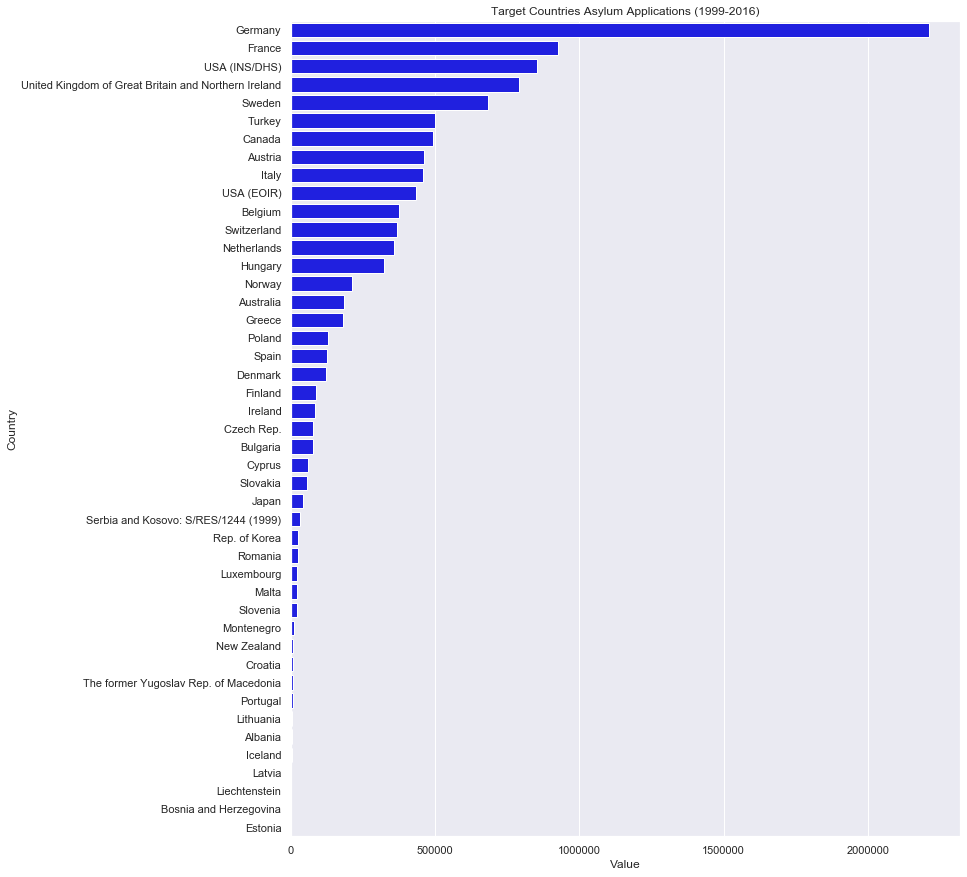

In [38]:
fig, ax= plt.subplots(figsize=(12, 15))

data_df \
    .groupby('Country', as_index=False) \
    .agg({'Value' : np.sum}) \
    .sort_values('Value', ascending=False) \
    .pipe((sns.barplot, 'data'), 
        y='Country', 
        x='Value', 
        color='blue',
        ax=ax
    )

ax.set(title='Target Countries Asylum Applications (1999-2016)');

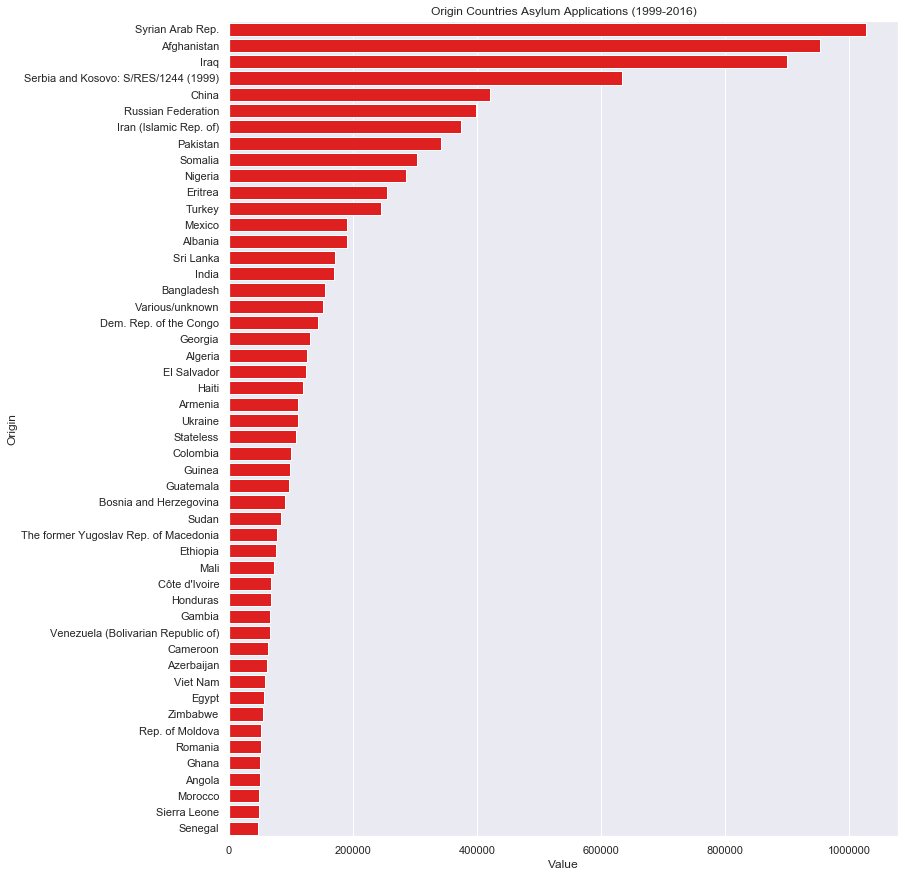

In [44]:
fig, ax= plt.subplots(figsize=(12, 15))

data_df \
    .groupby('Origin', as_index=False) \
    .agg({'Value' : np.sum}) \
    .sort_values('Value', ascending=False) \
    .head(50) \
    .pipe((sns.barplot, 'data'), 
        y='Origin', 
        x='Value',
        color='red',
        ax=ax
    )

ax.set(title='Origin Countries Asylum Applications (1999-2016)');